#Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Hackathons/WaffleHacks/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3114 files belonging to 36 classes.


##Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Hackathons/WaffleHacks/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [6]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [8]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [15]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 103s 1s/step - loss: 2.2861 - accuracy: 0.3513 - val_loss: 1.2773 - val_accuracy: 0.7721
Epoch 2/32
98/98 [==============================] - 97s 956ms/step - loss: 1.9609 - accuracy: 0.4342 - val_loss: 0.9535 - val_accuracy: 0.8547
Epoch 3/32
98/98 [==============================] - 104s 1s/step - loss: 1.5418 - accuracy: 0.5536 - val_loss: 0.6101 - val_accuracy: 0.8860
Epoch 4/32
98/98 [==============================] - 121s 1s/step - loss: 1.3466 - accuracy: 0.5906 - val_loss: 0.5063 - val_accuracy: 0.8946
Epoch 5/32
98/98 [==============================] - 116s 1s/step - loss: 1.0052 - accuracy: 0.7017 - val_loss: 0.4193 - val_accuracy: 0.9345
Epoch 6/32
98/98 [==============================] - 109s 1s/step - loss: 0.8597 - accuracy: 0.7502 - val_loss: 0.4242 - val_accuracy: 0.9231
Epoch 7/32
98/98 [==============================] - 109s 1s/step - loss: 0.6911 - accuracy: 0.7961 - val_loss: 0.3128 - val_accuracy: 0.9516
Epoch 8/32


##Evaluating Model

In [16]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 62s 593ms/step - loss: 0.0771 - accuracy: 0.9791
Training accuracy: 0.979126513004303


In [17]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 8s 214ms/step - loss: 0.3332 - accuracy: 0.9544
Validation accuracy: 0.9544159770011902


##Saving Model

In [18]:
cnn.save('trained_model.h5')

In [19]:
training_history.history #Return Dictionary of history

{'loss': [2.2860724925994873,
  1.9608951807022095,
  1.5417745113372803,
  1.3466429710388184,
  1.0051651000976562,
  0.8597208857536316,
  0.6911334991455078,
  0.6292901039123535,
  0.5429316163063049,
  0.48374301195144653,
  0.35595977306365967,
  0.3902417719364166,
  0.32913336157798767,
  0.3035392165184021,
  0.33115413784980774,
  0.29428938031196594,
  0.20819485187530518,
  0.26297131180763245,
  0.21268081665039062,
  0.22470037639141083,
  0.204393669962883,
  0.17203612625598907,
  0.20605549216270447,
  0.25456902384757996,
  0.2544699013233185,
  0.18820588290691376,
  0.20639008283615112,
  0.20326320827007294,
  0.16870170831680298,
  0.19965501129627228,
  0.19778281450271606,
  0.22750583291053772],
 'accuracy': [0.3513166308403015,
  0.43416827917099,
  0.5536288022994995,
  0.5905587673187256,
  0.7016698718070984,
  0.7501605749130249,
  0.7960821986198425,
  0.8159922957420349,
  0.8442517518997192,
  0.8590237498283386,
  0.8866409659385681,
  0.8921002149581

In [20]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [21]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation set

In [22]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 95.44159770011902 %


#Accuracy Visualization

##Training Visualization

In [23]:
#training_history.history['accuracy']

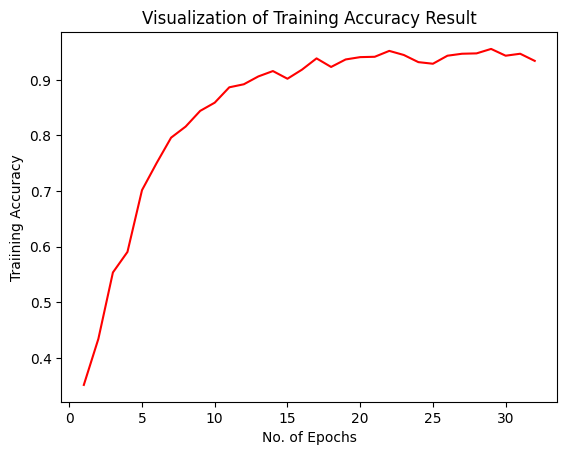

In [24]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

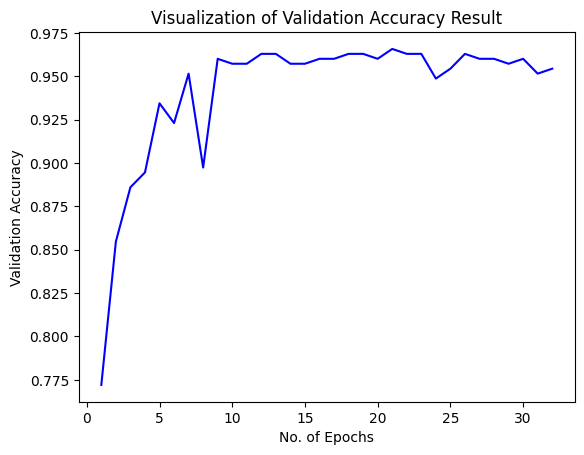

In [25]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Hackathons/WaffleHacks/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [29]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 63s 967ms/step - loss: 0.3261 - accuracy: 0.9554
Test accuracy: 0.9554317593574524
